In [1]:
import pandas as pd
import requests
import json
from config import api_key
import gmaps
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/cleaned_data/cleaned_bank_loan_modeling_no_9307.csv")
df_Cali = pd.read_csv("../data/cleaned_data/Cleaned_ZipCodes2.csv")
df_CaliYesNo = pd.read_csv("../data/cleaned_data/Cleaned_ZipCodesYesNo.csv")

df_CaliYesNo.head()

,Age,Years Work Experience,Income,ZIP Code,Family Size,Monthly Credit Card Spending,Education Level,Value of Mortgage,Personal Loan,lat,...,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,25,1,49000,91107,4,1600,Undergrad,0,No,34.15919,...,33481.0,1528.4,6037,Los Angeles,"{""06037"": 100}",Los Angeles,6037,False,False,America/Los_Angeles
1,30,4,60000,91107,4,2200,Graduate,0,No,34.15919,...,33481.0,1528.4,6037,Los Angeles,"{""06037"": 100}",Los Angeles,6037,False,False,America/Los_Angeles
2,35,10,200000,91107,2,3000,Undergrad,458000,No,34.15919,...,33481.0,1528.4,6037,Los Angeles,"{""06037"": 100}",Los Angeles,6037,False,False,America/Los_Angeles
3,54,30,93000,91107,1,2700,Graduate,0,No,34.15919,...,33481.0,1528.4,6037,Los Angeles,"{""06037"": 100}",Los Angeles,6037,False,False,America/Los_Angeles
4,37,12,169000,91107,2,5200,Advanced/Professional,249000,Yes,34.15919,...,33481.0,1528.4,6037,Los Angeles,"{""06037"": 100}",Los Angeles,6037,False,False,America/Los_Angeles


In [2]:
df_Cali['Personal Loan'].astype('str')
df_Cali['Personal Loan'].dtype

dtype('int64')

In [3]:
df_Cali['Personal Loan'] = df_Cali['Personal Loan'].map({'Yes':1,'No':0})

In [9]:
df_frequent_pop = df_Cali[['ZIP Code', 'lat','lng', 'county_name','population','Personal Loan']]
df_frequent_pop

,ZIP Code,lat,lng,county_name,population,Personal Loan
0,91107,34.15919,-118.08688,Los Angeles,33481.0,NaN
1,91107,34.15919,-118.08688,Los Angeles,33481.0,NaN
2,91107,34.15919,-118.08688,Los Angeles,33481.0,NaN
3,91107,34.15919,-118.08688,Los Angeles,33481.0,NaN
4,91107,34.15919,-118.08688,Los Angeles,33481.0,NaN
...,...,...,...,...,...,...
4691,90068,34.12794,-118.32914,Los Angeles,21590.0,NaN
4692,94970,37.91694,-122.65553,Marin,653.0,NaN
4693,90813,33.78237,-118.19656,Los Angeles,56726.0,NaN
4694,94404,37.55620,-122.26905,San Mateo,36086.0,NaN


In [10]:
Loan_rate = df_frequent_pop['Personal Loan'].tolist()

In [11]:
# Create a map using state centroid coordinates to set markers
marker_locations = df_frequent_pop[['lat', 'lng']]

# Create a marker_layer using the poverty list to fill the info box
fig = gmaps.figure()
markers = gmaps.marker_layer(marker_locations,
    info_box_content=[f"Loan rate: {rate}" for rate in Loan_rate])
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
df_Cali.head()

,Age,Years Work Experience,Income,ZIP Code,Family Size,Monthly Credit Card Spending,Education Level,Value of Mortgage,Personal Loan,lat,...,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,25,1,49000,91107,4,1600,Undergrad,0,NaN,34.15919,...,33481.0,1528.4,6037,Los Angeles,"{""06037"": 100}",Los Angeles,6037,False,False,America/Los_Angeles
1,30,4,60000,91107,4,2200,Graduate,0,NaN,34.15919,...,33481.0,1528.4,6037,Los Angeles,"{""06037"": 100}",Los Angeles,6037,False,False,America/Los_Angeles
2,35,10,200000,91107,2,3000,Undergrad,458000,NaN,34.15919,...,33481.0,1528.4,6037,Los Angeles,"{""06037"": 100}",Los Angeles,6037,False,False,America/Los_Angeles
3,54,30,93000,91107,1,2700,Graduate,0,NaN,34.15919,...,33481.0,1528.4,6037,Los Angeles,"{""06037"": 100}",Los Angeles,6037,False,False,America/Los_Angeles
4,37,12,169000,91107,2,5200,Advanced/Professional,249000,NaN,34.15919,...,33481.0,1528.4,6037,Los Angeles,"{""06037"": 100}",Los Angeles,6037,False,False,America/Los_Angeles


In [13]:
df_pop_analyis = df_Cali[['ZIP Code','county_name','population','Personal Loan','lat','lng']]
df_frequent_pop = df_pop_analyis[:100]


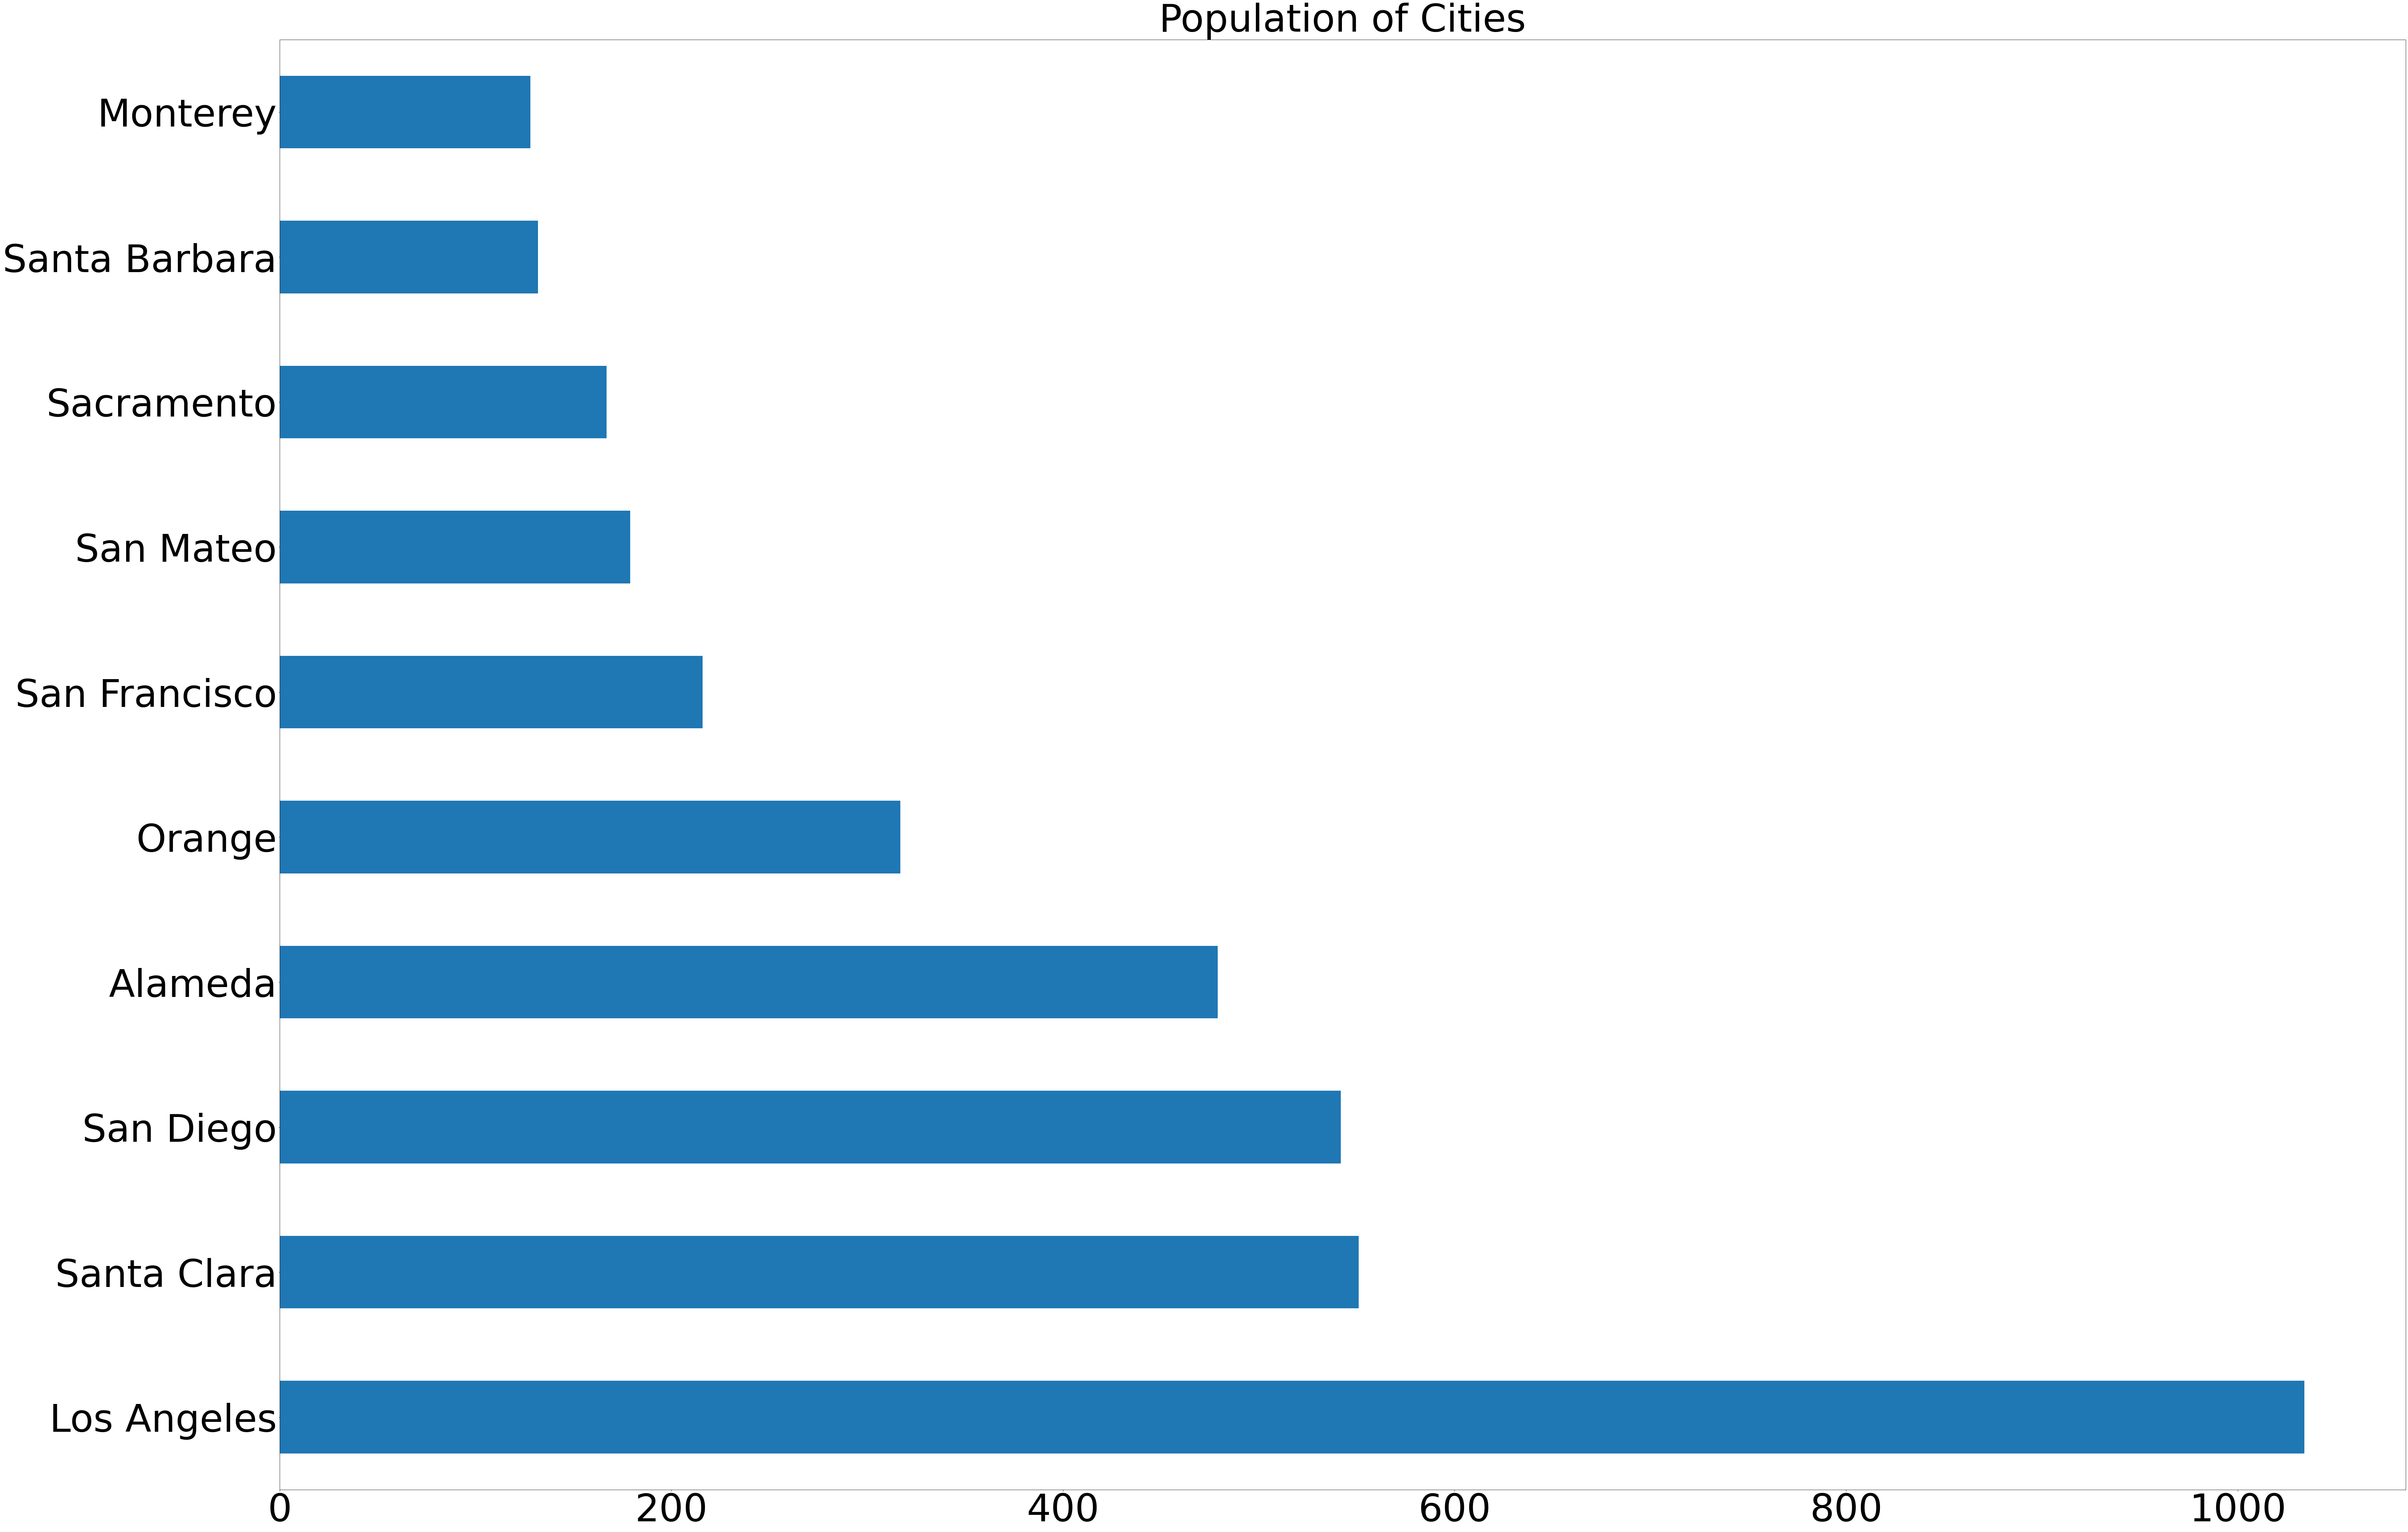

In [36]:
fig = df_pop_analyis['county_name'].value_counts()[:10].plot(kind='barh', figsize = (100,70), title='Population of Cities', fontsize = 100)
fig.axes.title.set_size(100)


<AxesSubplot:ylabel='county_name,Personal Loan'>

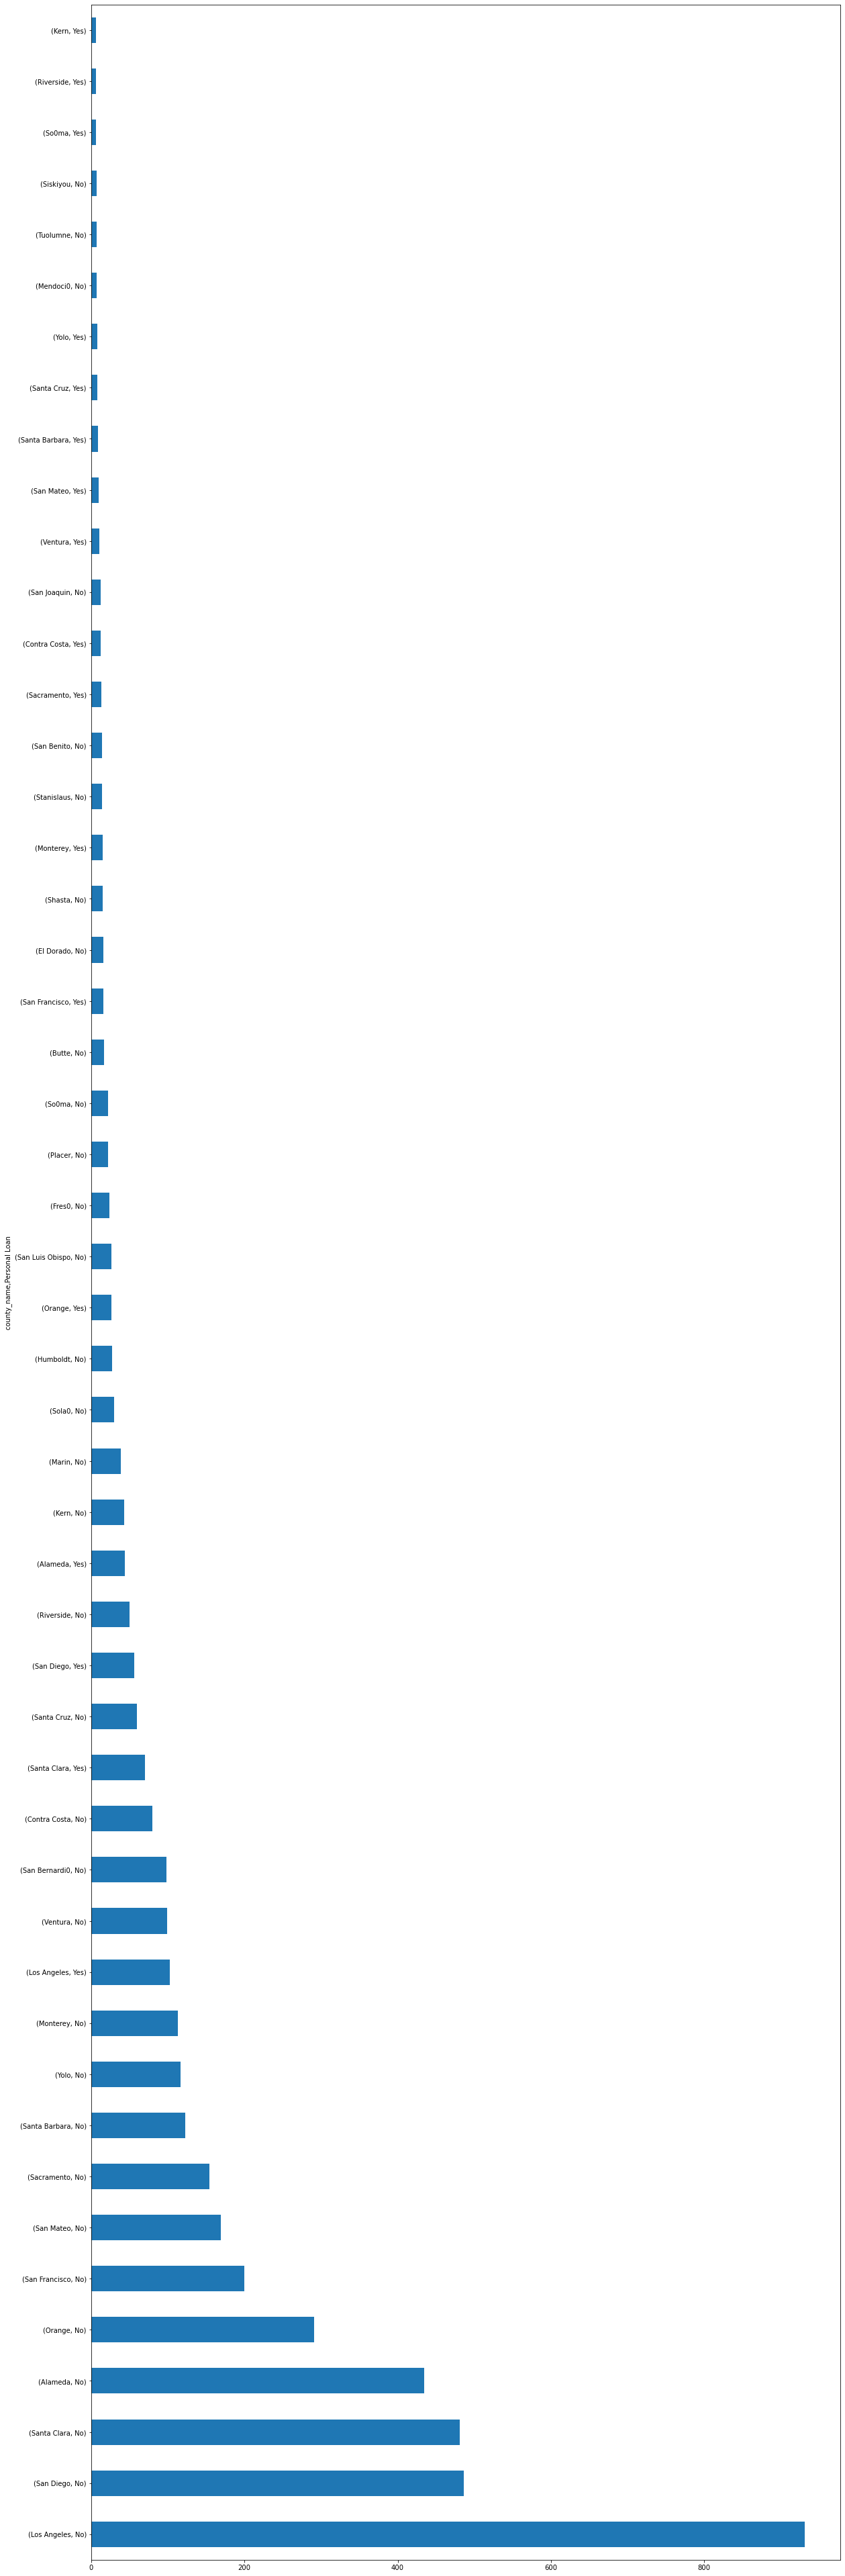

In [15]:
df_pop_analyis1 = df_CaliYesNo[['ZIP Code','county_name','population','Personal Loan','lat','lng']]

df_city_analysis = df_pop_analyis1[['county_name', 'Personal Loan']]
# df_city_analysis.count
df_city_analysis.value_counts()[:50].plot(kind='barh', figsize = (20,70))

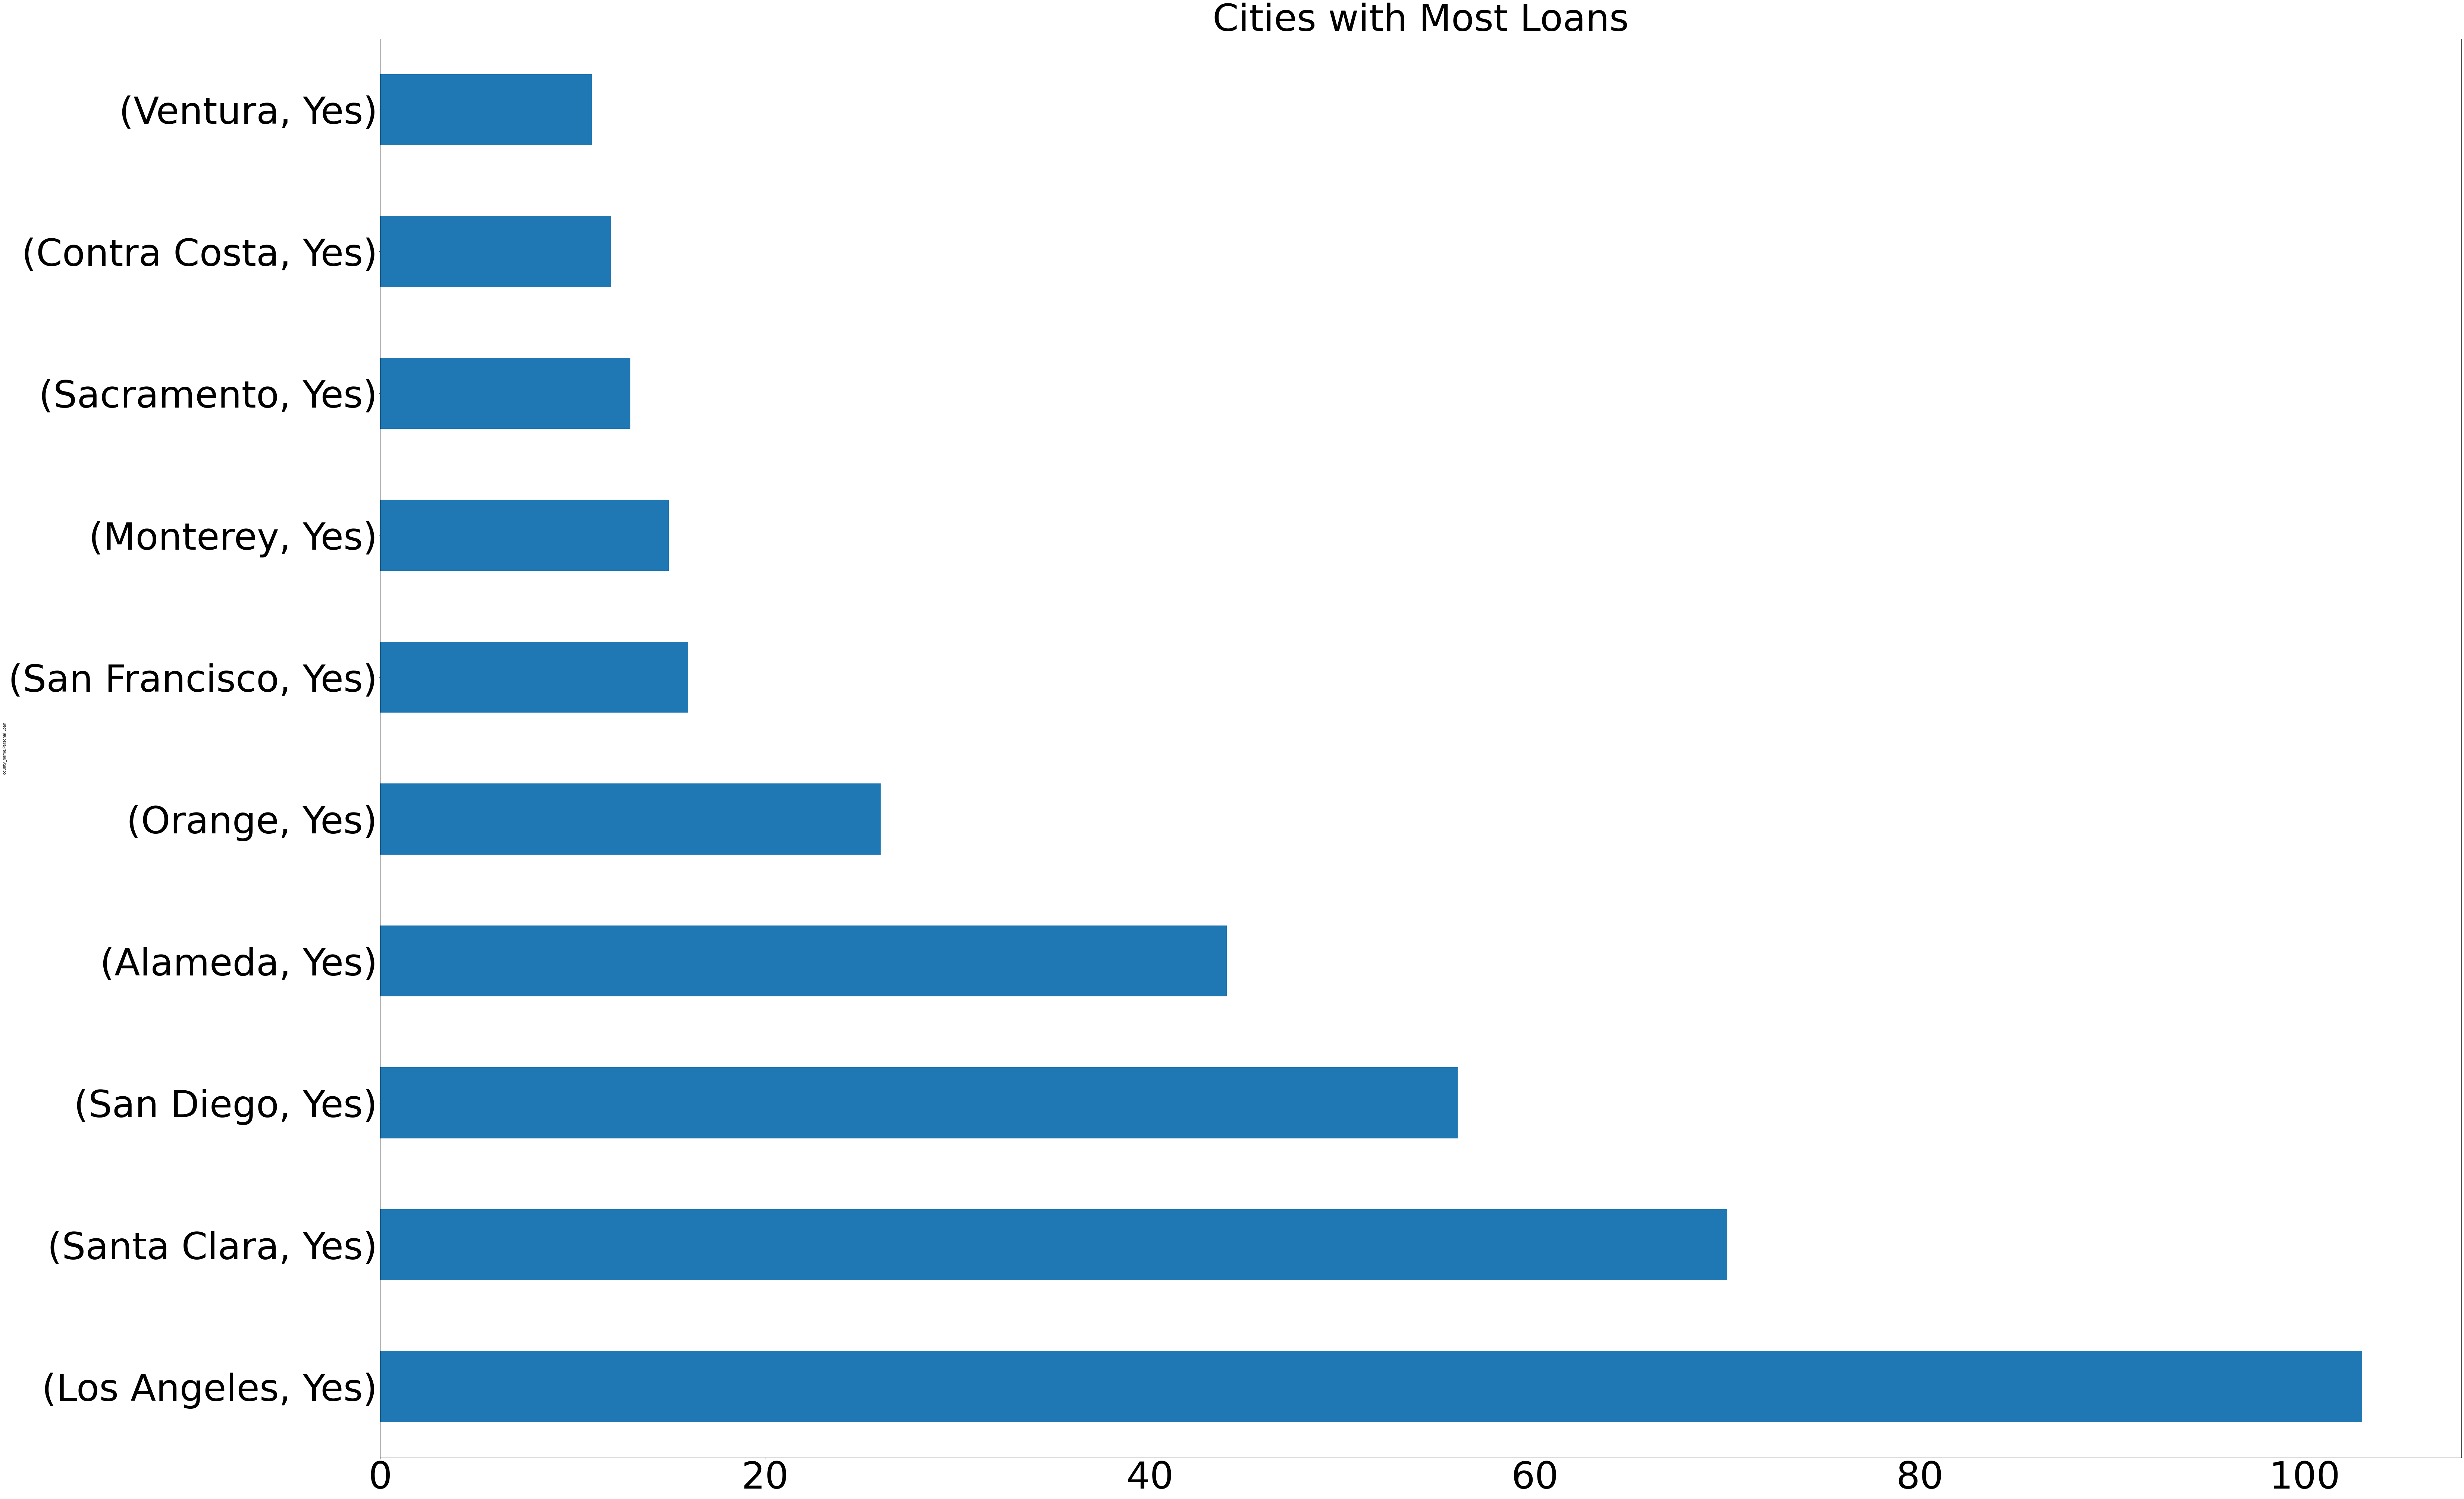

In [27]:
df_yes = df_pop_analyis1[df_city_analysis['Personal Loan'] == 'Yes']
df_frequent_yes=df_yes[['county_name', "Personal Loan"]]
fig = df_frequent_yes.value_counts()[:10].plot(kind='barh', figsize = (100,70), title='Cities with Most Loans', fontsize = 100)
fig.axes.title.set_size(100)


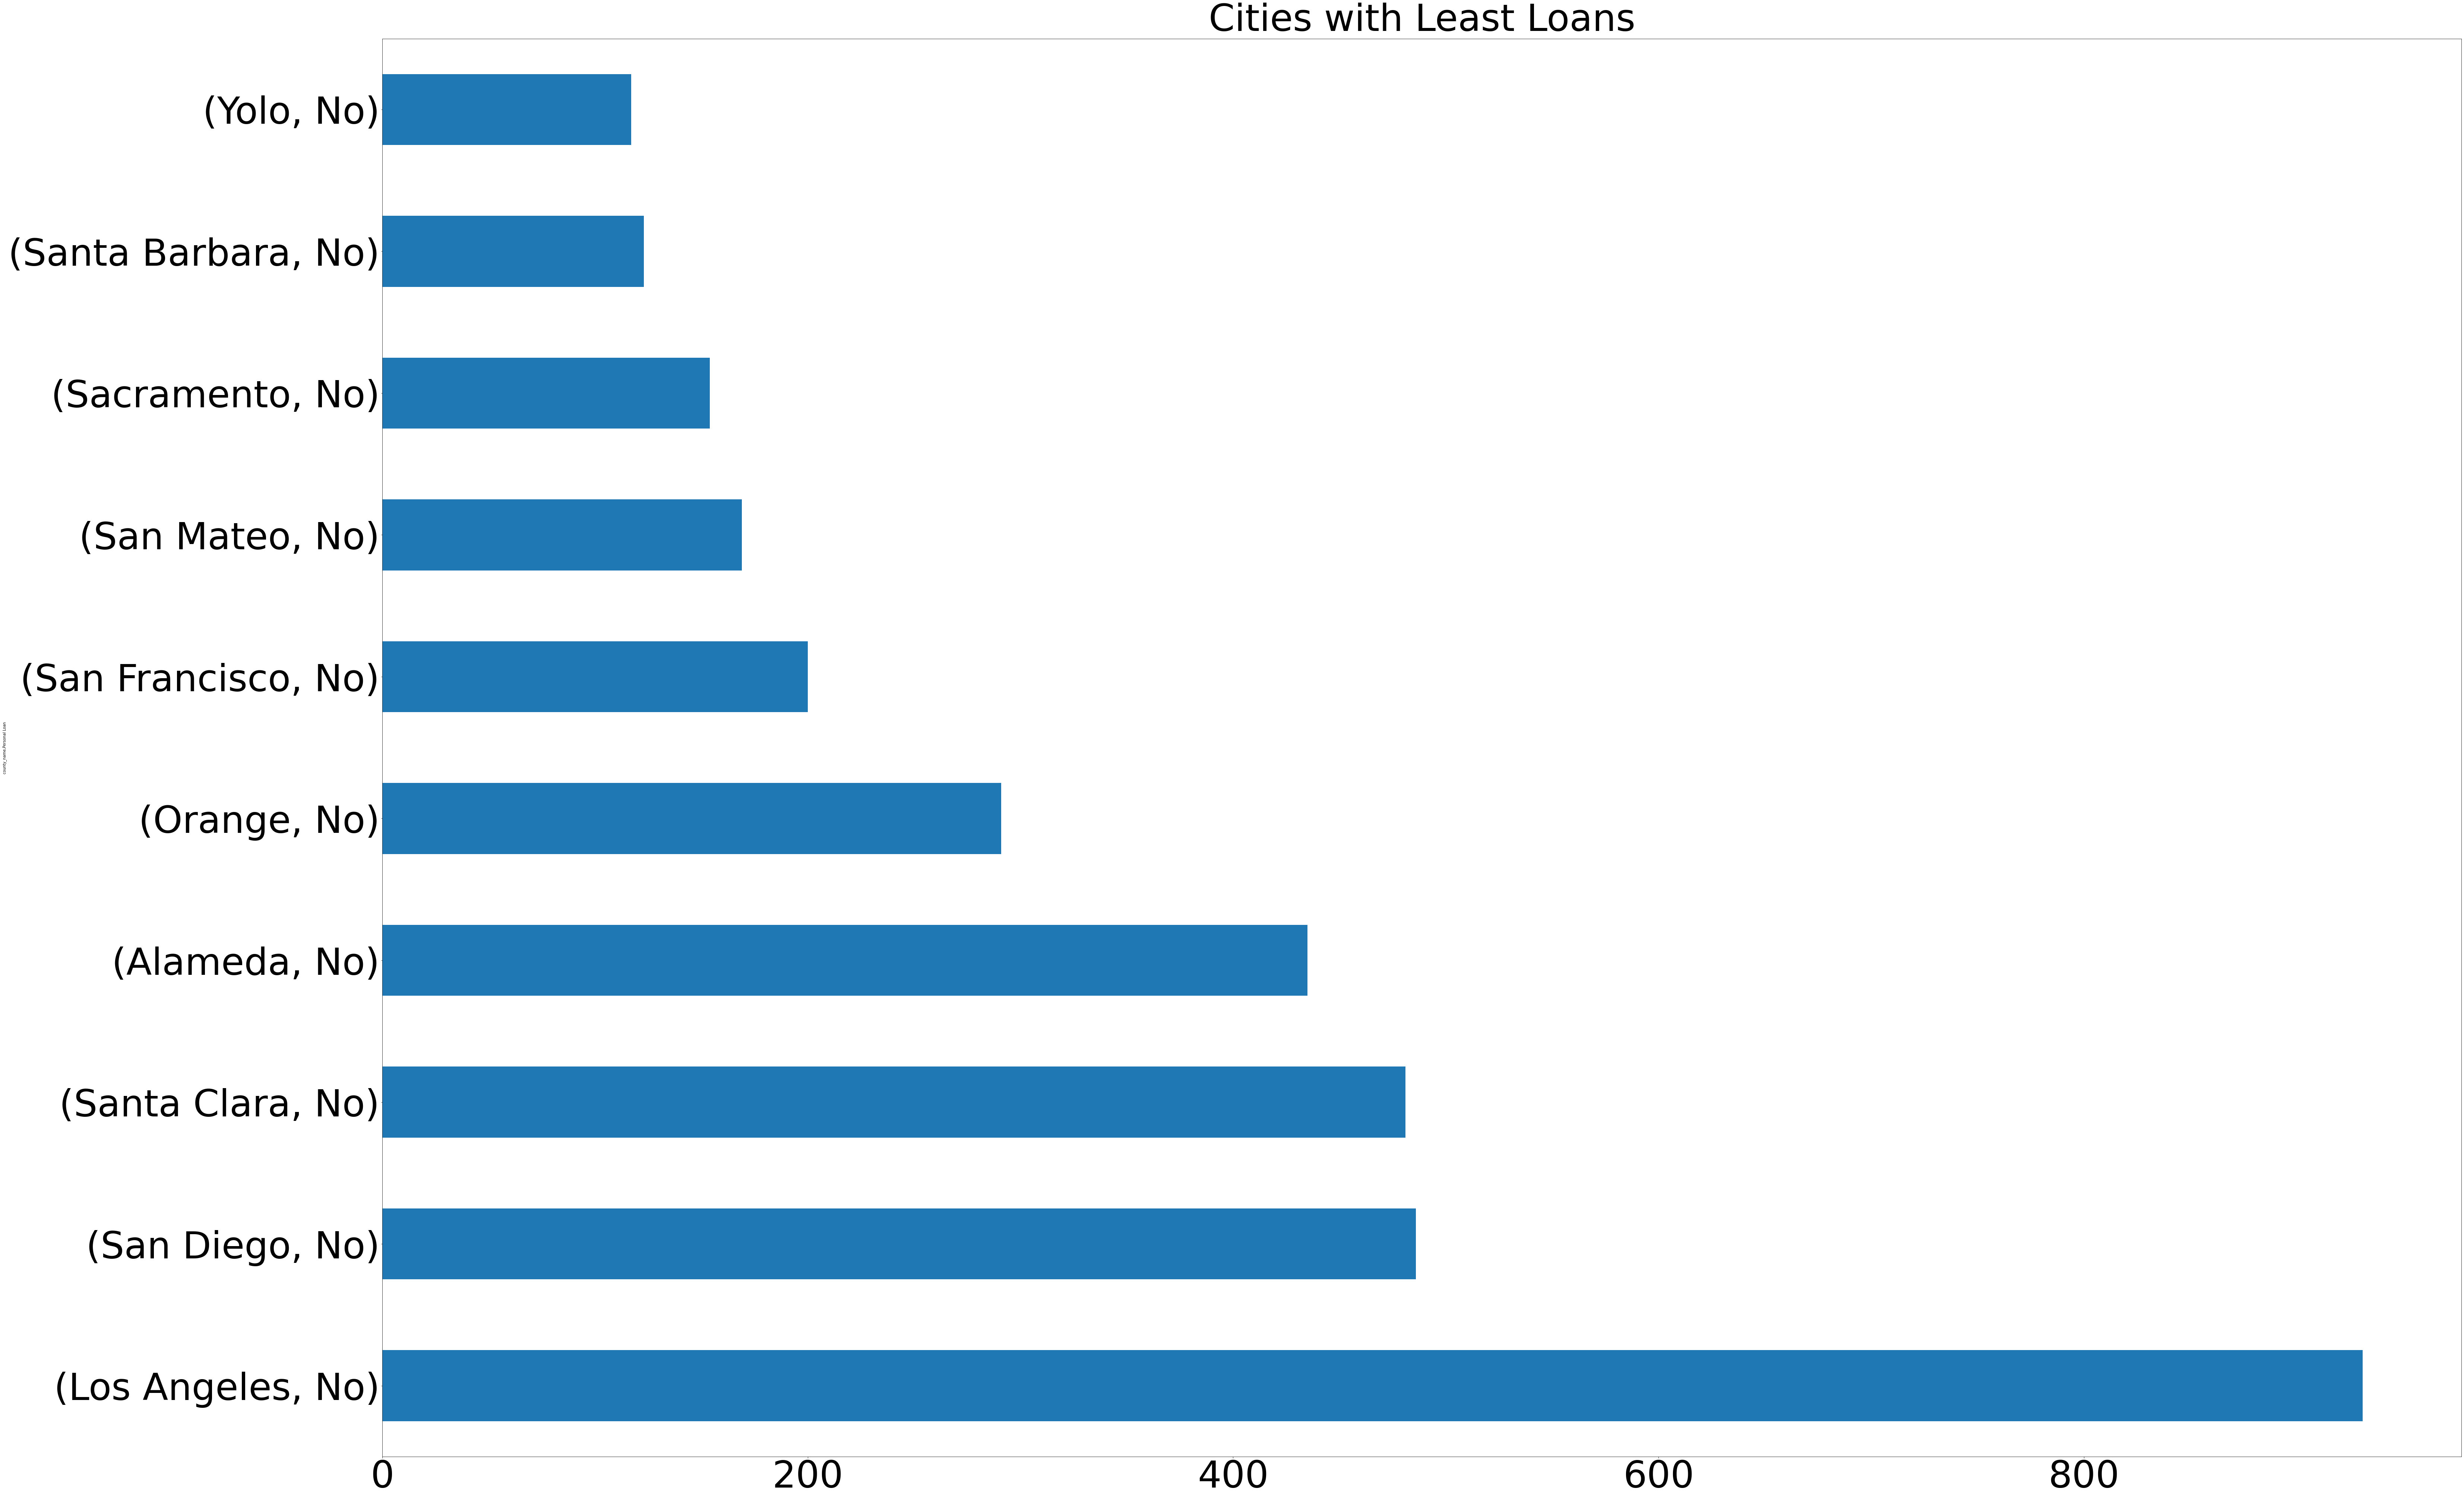

In [26]:
df_no = df_pop_analyis1[df_city_analysis['Personal Loan'] == 'No']
df_frequent_no=df_no[['county_name', "Personal Loan"]]
fig = df_frequent_no.value_counts()[:10].plot(kind='barh', figsize = (100,70), title='Cities with Least Loans', fontsize = 100)
fig.axes.title.set_size(100)

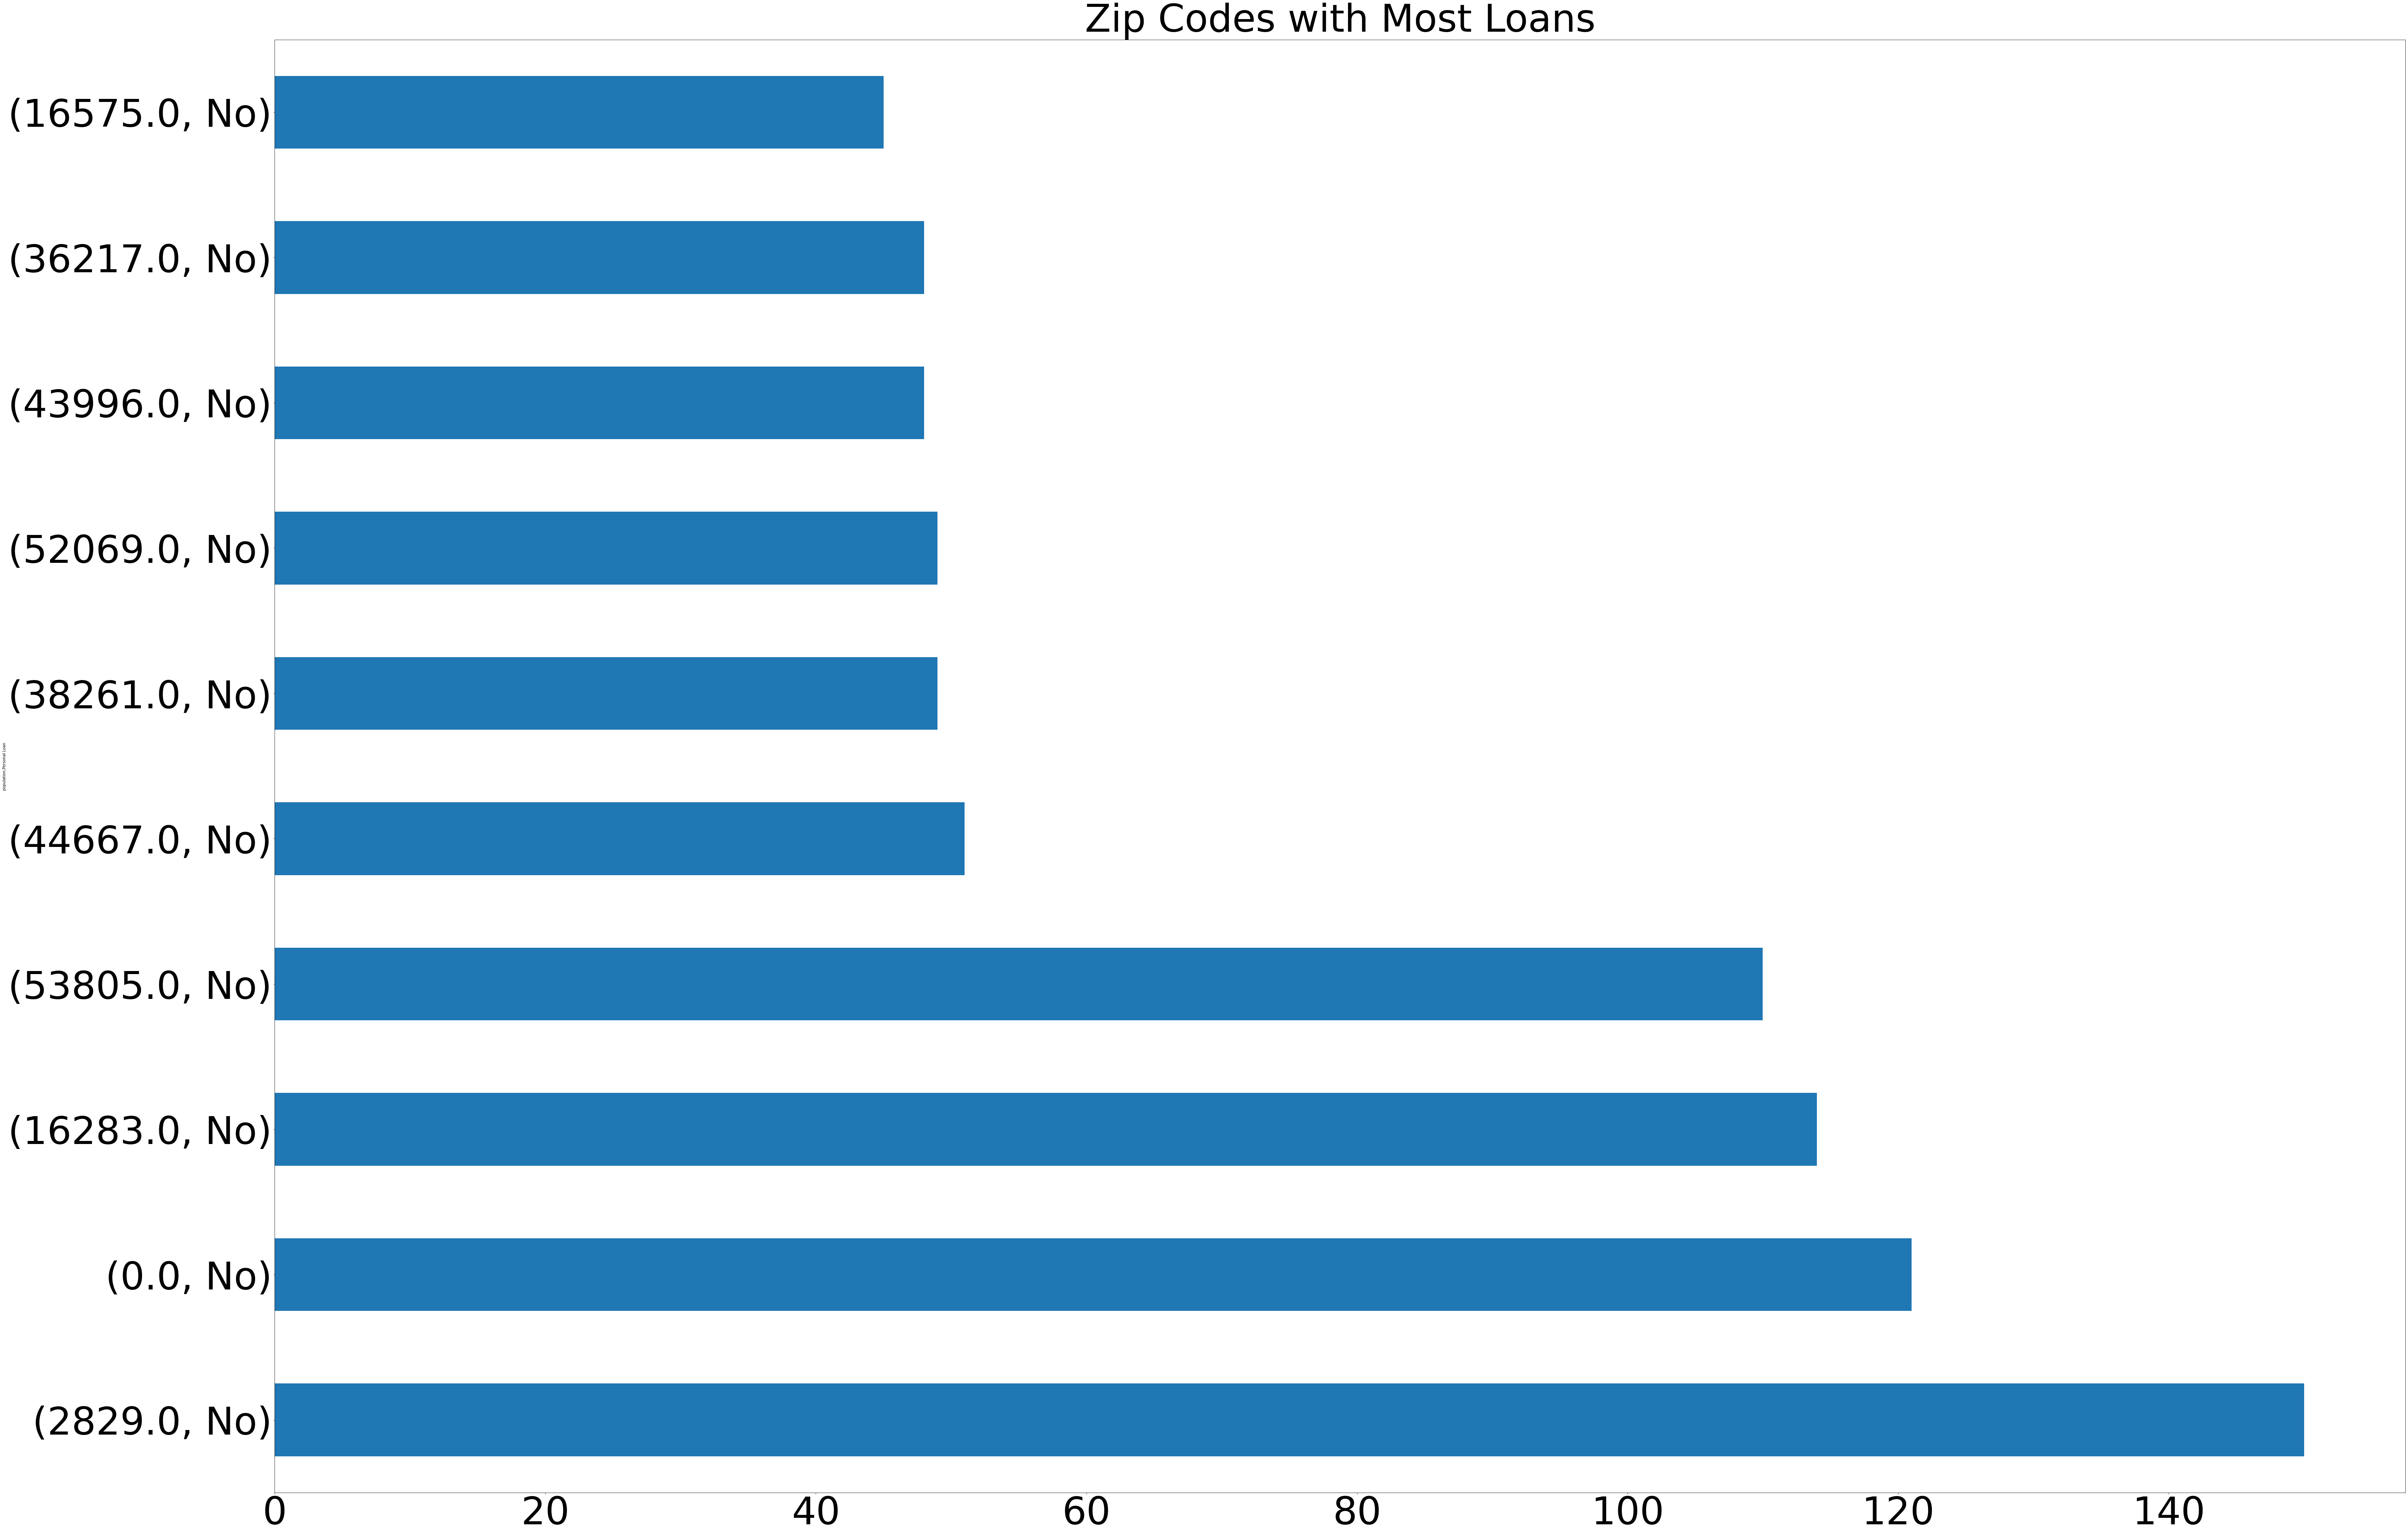

In [24]:
df_no = df_pop_analyis1[df_city_analysis['Personal Loan'] == 'No']
df_frequent_no=df_no[['population', "Personal Loan"]]
fig = df_frequent_no.value_counts()[:10].plot(kind='barh', figsize = (100,70), title='Zip Codes with Most Loans', fontsize = 100)
fig.axes.title.set_size(100)

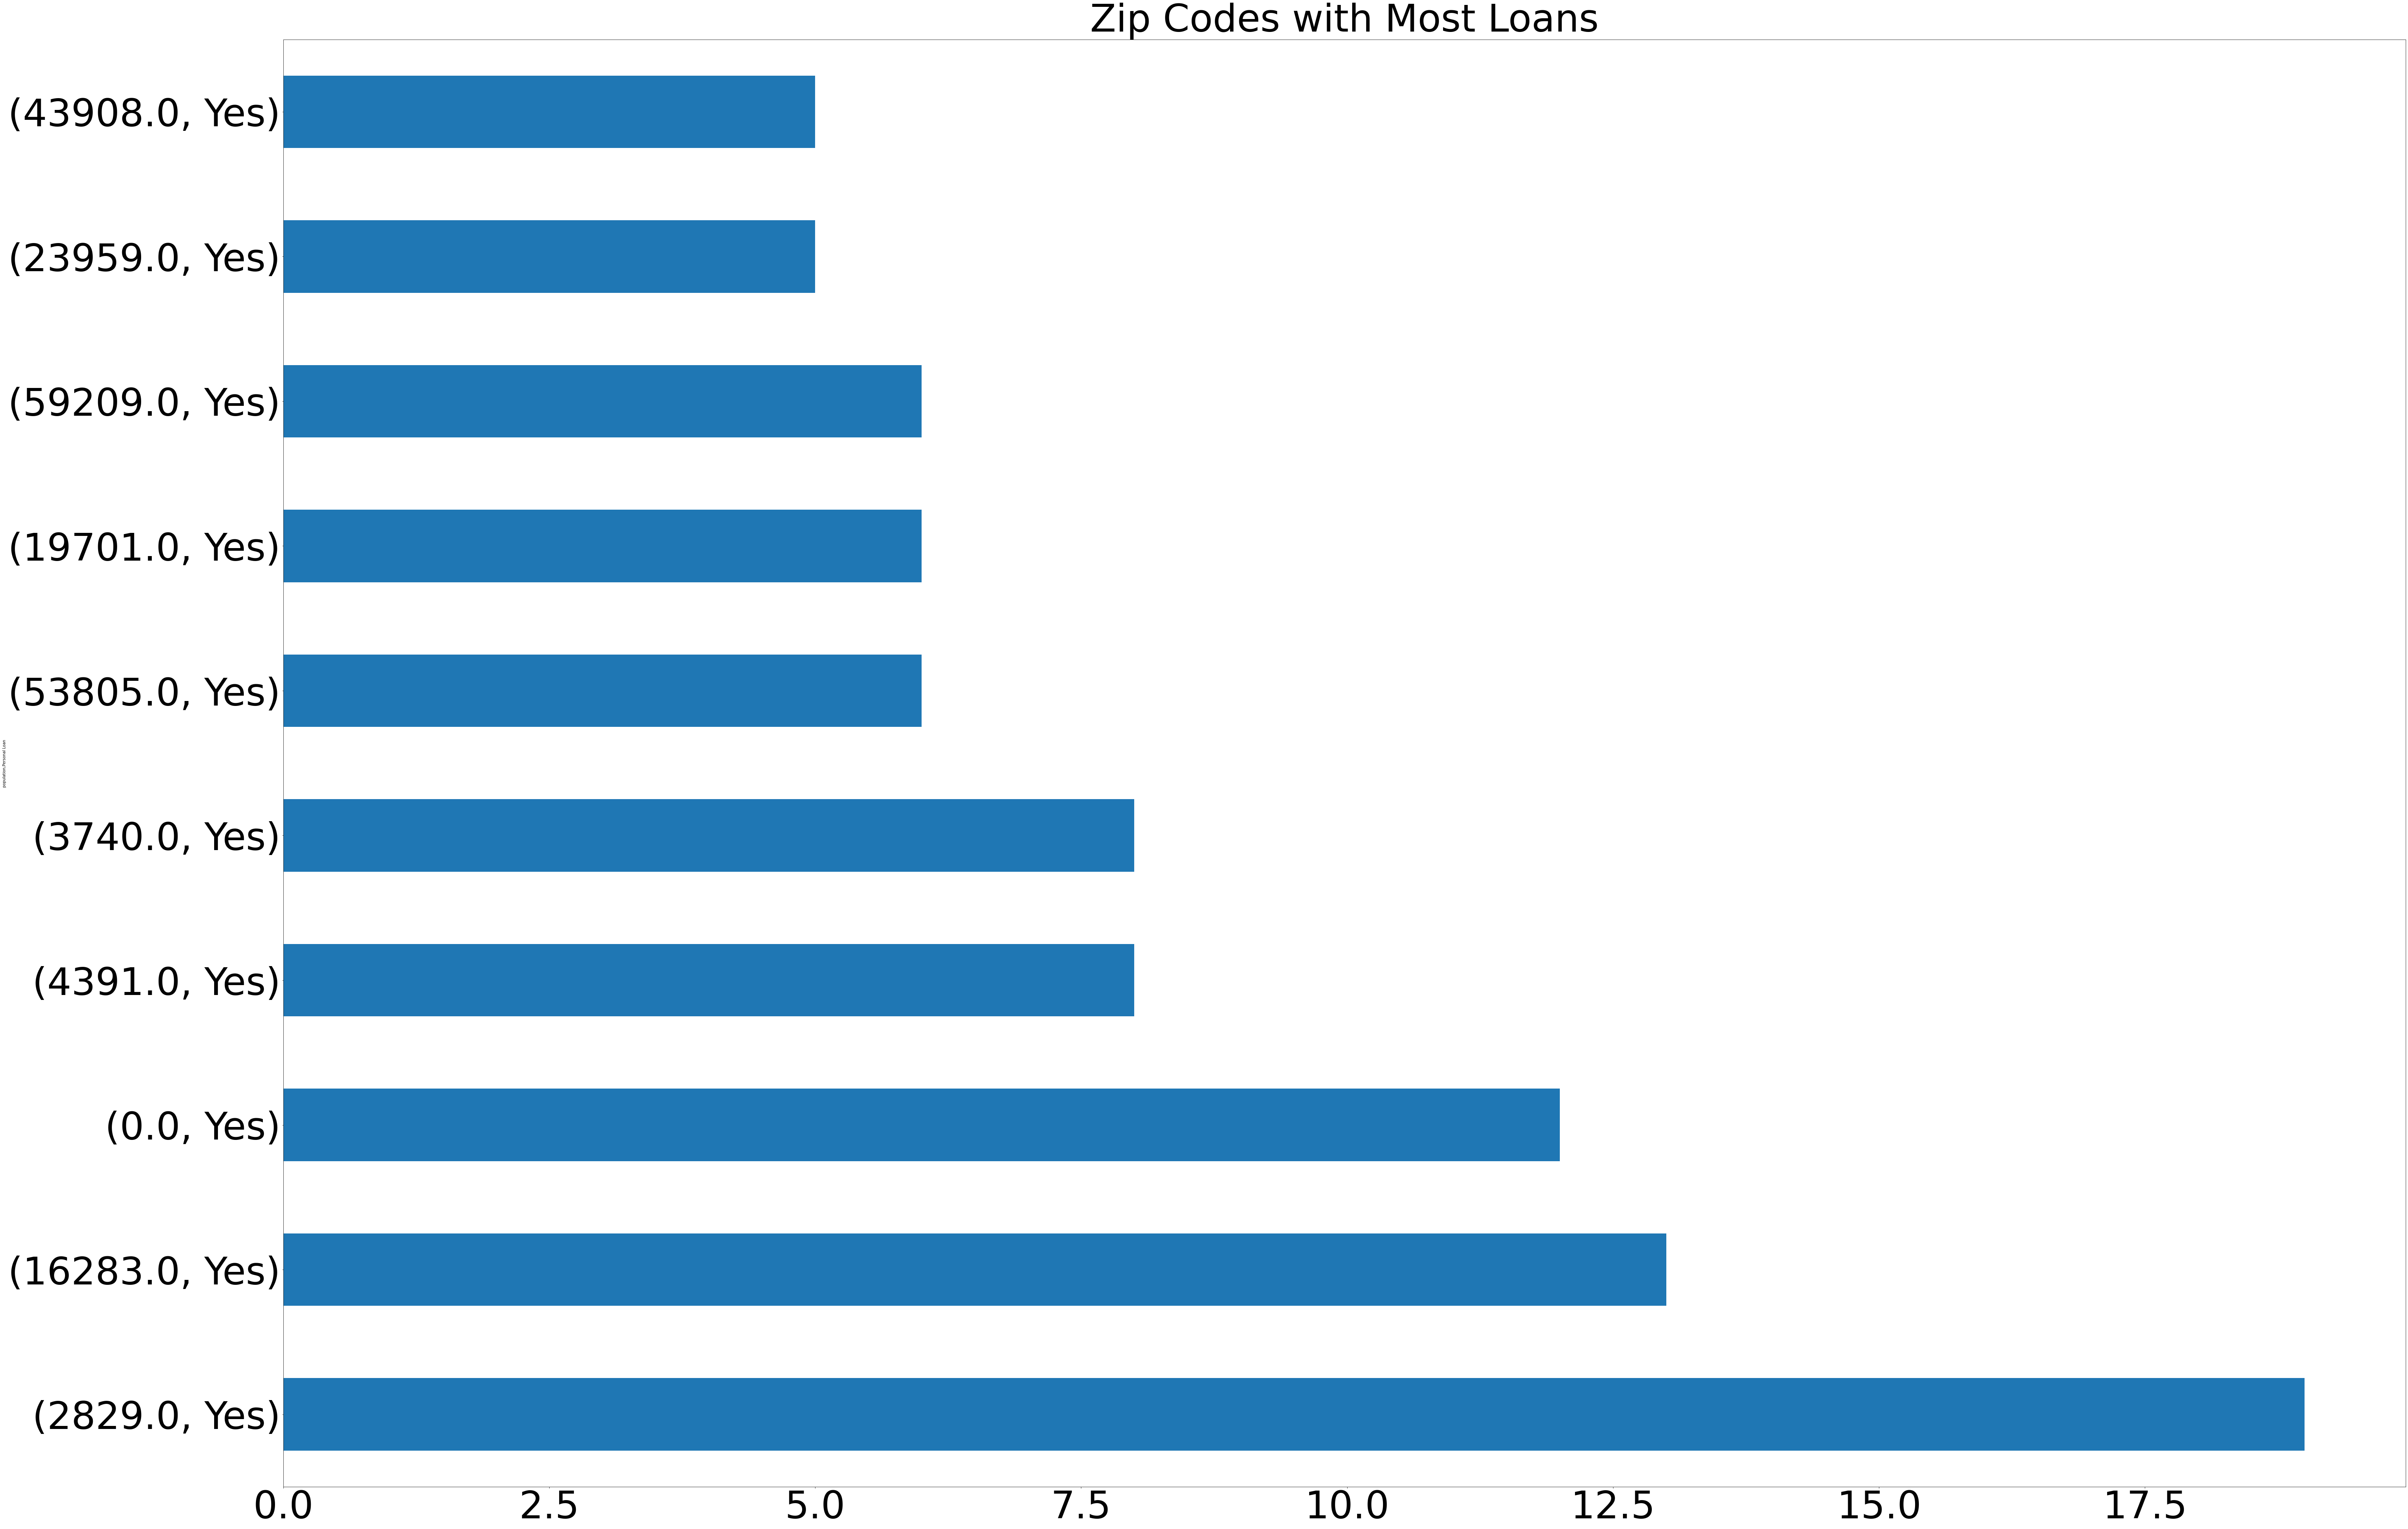

In [25]:
df_yes = df_pop_analyis1[df_city_analysis['Personal Loan'] == 'Yes']
df_frequent_yes=df_yes[['population', "Personal Loan"]]
fig = df_frequent_yes.value_counts()[:10].plot(kind='barh', figsize = (100,70), title='Zip Codes with Most Loans', fontsize = 100)
fig.axes.title.set_size(100)

In [ ]:
frequent= []
df_frequent = df['ZIP Code'].value_counts()[:100]
df_frequent.to_frame().reset_index()
df_frequent.drop(columns =['ZIP Code'])
df_frequent.to_frame()
df_frequent.reset_index()

In [ ]:
df_freq_new = df.groupby('ZIP Code').size().sort_values(ascending=False).to_frame()[:10].reset_index()
df_freq_new.drop([0], axis = 1)

In [ ]:
df_freq_new.columns

In [ ]:
list_freq = df_frequent['ZIP Code'].tolist()

In [ ]:
df_low = df['ZIP Code'].value_counts().sort_values(ascending=True)[0:10]
df_low.reindex(['ZIP Code'])
df_low.columns.values()

In [ ]:
df_zip_limited.head()

In [ ]:
df_zip_limited = [str(x) for x in df_zip_limited]


In [ ]:
if isinstance(df_freq_new, pd.Series):
    print('something')

In [ ]:
if isinstance(df_freq_new, pd.DataFrame):
    print('something')

In [ ]:
for index, value in df_zip.items():
    zip = {value}
zip

In [ ]:
url = "https://maps.googleapis.com/maps/api/geocode/json"
params = {"key": api_key,
        "address":92612 }
zip_request = requests.get(url, params=params)
zip_request=zip_request.json()
print(zip_request)

In [ ]:
df_zip.values[0:100]

In [ ]:
zip_request['results'][0]['address_components'][1]['long_name']

In [ ]:
import time
url = "https://maps.googleapis.com/maps/api/geocode/json"
params = {"key": api_key,"address":zip }
cities=[]
for zip in df_freq_new.iterrows():
    zip_request = requests.get(url, params=params)
    zip_request=zip_request.json()
    time.sleep(1)
    try:
        cities.append(zip_request['results'][0]['address_components'][1]['long_name'])
    except:
        cities.append('Null')
# least_cities = pd.DataFrame({
#     'Zip Code': df_freq_new,'city name':cities
# })    

In [ ]:
cities

In [ ]:
least_cities

In [ ]:
popular_cities

In [ ]:
new_cities

In [ ]:
zip_codes=[]

lat = []
for index, value in df_zip.items():
    zip = {value}
    url = "https://maps.googleapis.com/maps/api/geocode/json"
    params = {"key": api_key,
        "address":zip }
    zip_request = requests.get(url, params=params)
    zip_request=zip_request.json()
    try:
        cities.append(zip_request["results"][0]["address_components"][1]["long_name"])
#         zip_codes.append(zip_request["results"][0]["address_components"][0]["long_name"])
    except IndexError:
        print("city bad.")
#     lat.append(zip_request["results"][2]["geometry"][0]["location"]["lat"])    

In [ ]:
# create dataframe
zip_city_df = pd.DataFrame({
    "Cities": cities,
    "Zip Code": zip_codes
    
})

zip_city_df

In [ ]:
print(zip_request["results"][0]["address_components"][1]["long_name"])
print(zip_request["results"][0]["address_components"][0]["long_name"])

In [ ]:
marker_locations = zip_city_df['Zip Code']

fig = gmaps.figure()
markers = gmaps.marker_layer(marker_locations,
    info_box_content= [for value in cities]
fig.add_layer(markers)
fig